In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import plotly.express as px

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from tqdm import tqdm

In [4]:
df = pd.read_csv(r"C:\Users\HP Notebook\Desktop\airbnb data\Airbnb_data.csv")

In [5]:
reviews = pd.read_csv(r"C:\Users\HP Notebook\Desktop\airbnb data\review.csv")


In [6]:
df=df.rename(columns={'id':'listing_id'})

In [7]:
reviews=reviews.dropna()

In [8]:
reviews=reviews[reviews.listing_id.isin(list(df.listing_id))].dropna()

In [11]:
reviews.rename(columns={"id":"review_id"},inplace=True)
reviews.rename(columns={"date":"review_date"},inplace=True)

In [12]:
reviews

listing_id            review_id review_date  reviewer_id  \
0             2595                17857  2009-11-21        50679   
1             2595                19176  2009-12-05        53267   
2             2595                19760  2009-12-10        38960   
3             2595                34320  2010-04-09        71130   
11            2595                46312  2010-05-25       117113   
...            ...                  ...         ...          ...   
628995    36272851   801505394841228908  2023-01-10     49522871   
628996    36272851   813806654426981477  2023-01-27     89744946   
628997    36272851   816019166744138385  2023-01-30     60217561   
628998    36272851   886300510638246353  2023-05-07     17971998   
628999    36272851  1020368315651522074  2023-11-08     68063685   

       reviewer_name                                           comments  
0               Jean  Notre séjour de trois nuits.\r<br/>Nous avons ...  
1               Cate                                  Great experience.  
2              Anita  I've stayed with my friend at the Midtown Cast...  
3            Kai-Uwe  We've been staying here for about 9 nights, en...  
11            Alicia  We had a wonderful stay at Jennifer's charming...  
...              ...                                                ...  
628995          Jack  The place works for a few days if you’re seeki...  
628996        Aminta  This is a wonderful apartment with an ideal pr...  
628997         Chanh  Pretty good location, within walking distance ...  
628998          Udai  Great location<br/>Great price<br/>Very quiet ...  
628999       Rodrigo  El alojamiento está muy bien ubicado. Puedes l...  

[574807 rows x 6 columns]

In [19]:
reviews=reviews.rename(columns={'id':'review_id'})
reviews=reviews.rename(columns={'date':'review_date'})
df=df.rename(columns={'id':'listing_id'})
df=pd.merge(reviews,df,how='left',on='listing_id').dropna()

In [21]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['date_of_review'] = pd.to_datetime(df['review_date'])
df = df.reset_index(drop=True)


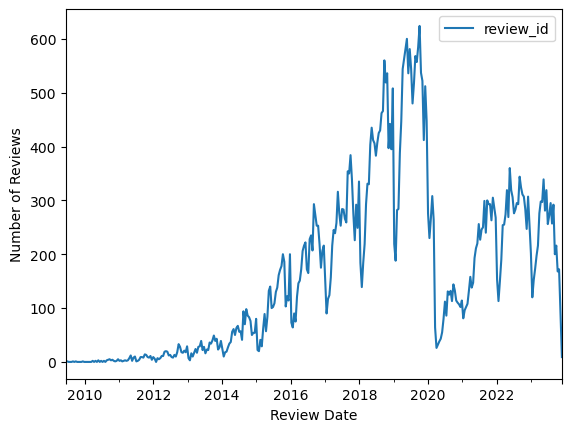

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# Sample a fraction of the data
df_sampled = df.sample(frac=0.1)  # Adjust the fraction as needed

# Convert 'review_date' to datetime if not already
df_sampled['review_date'] = pd.to_datetime(df_sampled['review_date'])

# Set 'review_date' as the index
df_sampled.set_index('review_date', inplace=True)

# Group by 15-day intervals and plot the count of 'review_id'
ax = df_sampled.groupby(pd.Grouper(freq='15D')).agg({'review_id': 'count'}).plot()

# Add labels to the plot
plt.xlabel('Review Date')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()



In [10]:
from langdetect import detect

def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

In [11]:
sid = SentimentIntensityAnalyzer()

reviews['polarity_value']="Default"
reviews['neg']=0.0
reviews['pos']=0.0
reviews['neu']=0.0
reviews['compound']=0.0
for index,row in tqdm(reviews.iterrows()):
    ss = sid.polarity_scores(row['comments'])
    reviews.at[index,'polarity_value']=ss
    reviews.at[index,'neg']=ss['neg']
    reviews.at[index,'pos']=ss['pos']
    reviews.at[index,'neu']=ss['neu']
    reviews.at[index,'compound']=ss['compound']
    lang=detect_lang(row['comments'])
    reviews.at[index,'language']=lang

574807it [56:15, 170.29it/s]


In [12]:
reviews

listing_id            review_id review_date  reviewer_id  \
0             2595                17857  2009-11-21        50679   
1             2595                19176  2009-12-05        53267   
2             2595                19760  2009-12-10        38960   
3             2595                34320  2010-04-09        71130   
11            2595                46312  2010-05-25       117113   
...            ...                  ...         ...          ...   
628995    36272851   801505394841228908  2023-01-10     49522871   
628996    36272851   813806654426981477  2023-01-27     89744946   
628997    36272851   816019166744138385  2023-01-30     60217561   
628998    36272851   886300510638246353  2023-05-07     17971998   
628999    36272851  1020368315651522074  2023-11-08     68063685   

       reviewer_name                                           comments  \
0               Jean  Notre séjour de trois nuits.\r<br/>Nous avons ...   
1               Cate                                  Great experience.   
2              Anita  I've stayed with my friend at the Midtown Cast...   
3            Kai-Uwe  We've been staying here for about 9 nights, en...   
11            Alicia  We had a wonderful stay at Jennifer's charming...   
...              ...                                                ...   
628995          Jack  The place works for a few days if you’re seeki...   
628996        Aminta  This is a wonderful apartment with an ideal pr...   
628997         Chanh  Pretty good location, within walking distance ...   
628998          Udai  Great location<br/>Great price<br/>Very quiet ...   
628999       Rodrigo  El alojamiento está muy bien ubicado. Puedes l...   

                                           polarity_value    neg    pos  \
0       {'neg': 0.021, 'neu': 0.979, 'pos': 0.0, 'comp...  0.021  0.000   
1       {'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...  0.000  0.804   
2       {'neg': 0.016, 'neu': 0.793, 'pos': 0.192, 'co...  0.016  0.192   
3       {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...  0.000  0.192   
11      {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compou...  0.000  0.490   
...                                                   ...    ...    ...   
628995  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  0.000   
628996  {'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'comp...  0.000  0.131   
628997  {'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...  0.000  0.477   
628998  {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...  0.000  0.312   
628999  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  0.000   

          neu  compound language  
0       0.979   -0.3612       fr  
1       0.196    0.6249       ro  
2       0.793    0.9248       en  
3       0.808    0.9229       en  
11      0.510    0.9464       en  
...       ...       ...      ...  
628995  1.000    0.0000       en  
628996  0.869    0.7964       en  
628997  0.523    0.7500       en  
628998  0.688    0.9213       en  
628999  1.000    0.0000       es  

[574807 rows x 12 columns]

In [1]:
review=pd.read_csv('review.csv')
review=review.rename(columns={'id':'review_id'})
review=review.rename(columns={'date':'review_date'})
df=airbnb.rename(columns={'id':'listing_id'})
df=pd.merge(review,airbnb,how='left',on='listing_id').dropna()

NameError: name 'pd' is not defined

In [14]:
english_reviews=reviews[reviews['language']=='en']

In [15]:
english_reviews

listing_id           review_id review_date  reviewer_id reviewer_name  \
2             2595               19760  2009-12-10        38960         Anita   
3             2595               34320  2010-04-09        71130       Kai-Uwe   
11            2595               46312  2010-05-25       117113        Alicia   
12            2595             1238204  2012-05-07      1783688        Sergey   
13            2595             1293632  2012-05-17      1870771          Loïc   
...            ...                 ...         ...          ...           ...   
628994    36272851  799252191561508062  2023-01-07    400523900        Xiaoqi   
628995    36272851  801505394841228908  2023-01-10     49522871          Jack   
628996    36272851  813806654426981477  2023-01-27     89744946        Aminta   
628997    36272851  816019166744138385  2023-01-30     60217561         Chanh   
628998    36272851  886300510638246353  2023-05-07     17971998          Udai   

                                                 comments  \
2       I've stayed with my friend at the Midtown Cast...   
3       We've been staying here for about 9 nights, en...   
11      We had a wonderful stay at Jennifer's charming...   
12      Hi to everyone!\r<br/>Would say our greatest c...   
13      Jennifer was very friendly and helpful, and he...   
...                                                   ...   
628994                                              Great   
628995  The place works for a few days if you’re seeki...   
628996  This is a wonderful apartment with an ideal pr...   
628997  Pretty good location, within walking distance ...   
628998  Great location<br/>Great price<br/>Very quiet ...   

                                           polarity_value    neg    pos  \
2       {'neg': 0.016, 'neu': 0.793, 'pos': 0.192, 'co...  0.016  0.192   
3       {'neg': 0.0, 'neu': 0.808, 'pos': 0.192, 'comp...  0.000  0.192   
11      {'neg': 0.0, 'neu': 0.51, 'pos': 0.49, 'compou...  0.000  0.490   
12      {'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...  0.000  0.271   
13      {'neg': 0.0, 'neu': 0.599, 'pos': 0.401, 'comp...  0.000  0.401   
...                                                   ...    ...    ...   
628994  {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...  0.000  1.000   
628995  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  0.000  0.000   
628996  {'neg': 0.0, 'neu': 0.869, 'pos': 0.131, 'comp...  0.000  0.131   
628997  {'neg': 0.0, 'neu': 0.523, 'pos': 0.477, 'comp...  0.000  0.477   
628998  {'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'comp...  0.000  0.312   

          neu  compound language  
2       0.793    0.9248       en  
3       0.808    0.9229       en  
11      0.510    0.9464       en  
12      0.729    0.9869       en  
13      0.599    0.9568       en  
...       ...       ...      ...  
628994  0.000    0.6249       en  
628995  1.000    0.0000       en  
628996  0.869    0.7964       en  
628997  0.523    0.7500       en  
628998  0.688    0.9213       en  

[504571 rows x 12 columns]

In [23]:
def rater(x):
    print(x)
    if x['neg']>=0.5:
        return 'negative'
    elif x['pos']>=0.5:
        return 'positive'
    elif x['neu']>=0.5:
        return 'neutral'
    else:
        return None

In [ ]:
english_reviews['rating']=english_reviews.apply(lambda x: rater(x),axis=1)

listing_id                                                     2595
review_id                                                     19760
review_date                                              2009-12-10
reviewer_id                                                   38960
reviewer_name                                                 Anita
comments          I've stayed with my friend at the Midtown Cast...
polarity_value    {'neg': 0.016, 'neu': 0.793, 'pos': 0.192, 'co...
neg                                                           0.016
pos                                                           0.192
neu                                                           0.793
compound                                                     0.9248
language                                                         en
Name: 2, dtype: object
listing_id                                                     2595
review_id                                                     34320
review_date              

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



listing_id                                                    13808
review_id                                                    350010
review_date                                              2011-07-03
reviewer_id                                                  701067
reviewer_name                                                 David
comments          Amazing place so very beautiful and spacious i...
polarity_value    {'neg': 0.0, 'neu': 0.43, 'pos': 0.57, 'compou...
neg                                                             0.0
pos                                                            0.57
neu                                                            0.43
compound                                                     0.9692
language                                                         en
Name: 7195, dtype: object
listing_id                                                    13808
review_id                                                    382302
review_date           

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
ols_model = sm.OLS(y_train, X_train).fit()
print(ols_model.summary())